### Import liabrary

In [169]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

###  Read Data

In [170]:
df_train= pd.read_csv("C:\\CsvFiles\\titanic_train.csv")
df_test  = pd.read_csv("C:\\CsvFiles\\titanic_test.csv")

In [171]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###  shape check

In [172]:
df_train.shape

(891, 12)

In [173]:
df_train.drop(columns=['Name','Ticket','PassengerId','Cabin'],inplace=True)
df_test.drop(columns=['Name','Ticket','PassengerId','Cabin'],inplace=True)

In [174]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Checking data num value

In [175]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

###  by using seaborn . check the num values in graph

<AxesSubplot:>

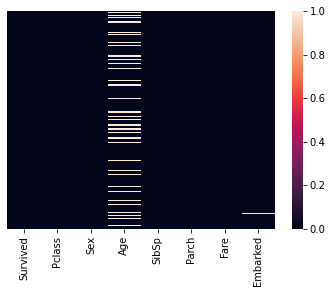

In [176]:
sns.heatmap(df_train.isnull(),yticklabels=False)

### check NuN values in % form

In [177]:
for i in df_train:
    if df_train[i].isnull().any():
        print('{0}....{1}'.format(i,df_train[i].isnull().sum()/df_train.shape[0]*100))

Age....19.865319865319865
Embarked....0.22446689113355783


### cleaning the  train data

In [178]:
for column in df_train:
    if df_train[column].dtype==float:
        if df_train[column].mean()-df_train[column].median()<10:
            df_train[column].fillna(df_train[column].mean(),inplace=True)
        else:
            df_train[column].fillna(df_train[column].median(),inplace=True)
    elif df_train[column].dtype==object:
        df_train[column].fillna(df_train[column].mode()[0],inplace=True)

In [179]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Checking NaN Values in Testing Data

In [180]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [181]:
df_test["Age"].fillna(df_test["Age"].mean(),inplace=True)
df_test["Fare"].fillna(df_test["Fare"].mean(),inplace=True)

### check shape again

In [182]:
df_train.shape

(891, 8)

### check unique value in Pclass

In [183]:
df_train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

### Remove and Check  Duplicates

In [184]:
mean_age = df_train.groupby('Pclass').mean()['Age'] #unique and duplicates found in Pclass .calculate mean on the basis of age
mean_age

Pclass
1    37.048118
2    29.866958
3    26.403259
Name: Age, dtype: float64

In [185]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [186]:
df_train['Survived'].value_counts().keys()

Int64Index([0, 1], dtype='int64')

###  Plot a Barplot on Survived catagorical

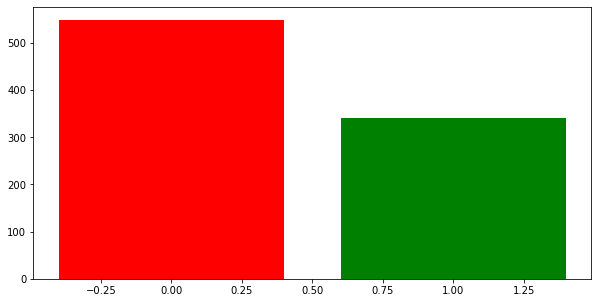

In [187]:
plt.figure(figsize=(10,5))
plt.bar(list(df_train['Survived'].value_counts().keys()),list(df_train['Survived'].value_counts()),color = ['r','g'])
plt.show()

In [188]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [189]:
df_train['Pclass'].value_counts().keys()

Int64Index([3, 1, 2], dtype='int64')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

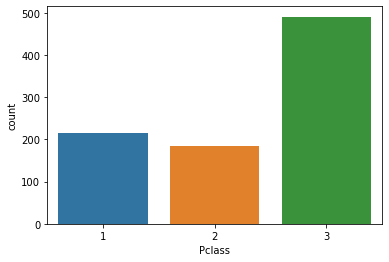

In [190]:
sns.countplot(df_train['Pclass'])


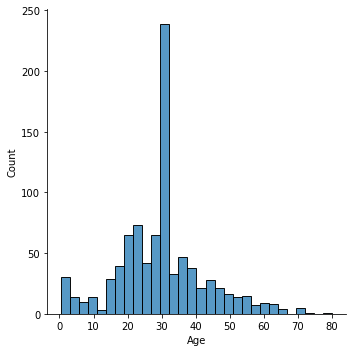

In [191]:
sns.displot(df_train['Age'])

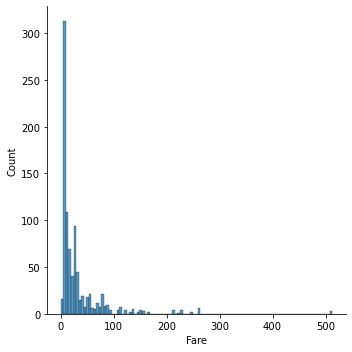

In [192]:
sns.displot(df_train['Fare'])

In [193]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [194]:
df_train['Sex'].value_counts().keys()

Index(['male', 'female'], dtype='object')

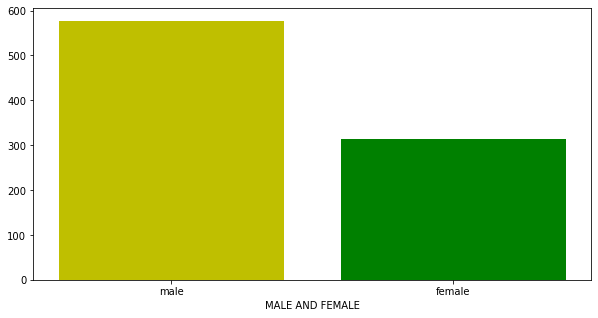

In [195]:
plt.figure(figsize=(10,5))
plt.bar(list(df_train['Sex'].value_counts().keys()),list(df_train['Sex'].value_counts()),color = ['y','g'])
plt.xlabel('MALE AND FEMALE')
plt.show()

###  Label-Encoding

In [196]:
label = LabelEncoder()

In [197]:
#df_train[['Sex','Embarked']].apply(label.fit_transform)
for i in df_train:
    if df_train[i].dtype=='O':
        df_train[i]= label.fit_transform(df_train[i])     

In [198]:
x = df_train.drop('Survived',axis=1)
y =df_train['Survived']

In [199]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [200]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

###  Data train

In [201]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [202]:
from xgboost import XGBClassifier

In [203]:
model1= XGBClassifier()

In [204]:
model1.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [205]:
x_train_pred = model1.predict(x_train)

In [206]:
x_test_pred = model1.predict(x_test)

In [207]:
acc = accuracy_score(y_train,x_train_pred)
acc

0.9634831460674157

In [208]:
acc1 = accuracy_score(y_test,x_test_pred)
acc1

0.7932960893854749

### Tunning

In [209]:
parameters = {"n_estimators":[50,100,150],
              "max_depth":[3,5,7,9,12],
              "learning_rate":[0.01,0.1,0.3,0.5]}

In [210]:
grid_search = GridSearchCV(model1,parameters,cv=5,n_jobs=-1)

In [211]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_threshold=64, max_cat_to_onehot=4,
                                     max_delta_step=0, max_depth=6,
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, mono

In [212]:
grid_search.best_score_

0.832837584950261

In [213]:
best_parameters = grid_search.best_params_
best_parameters

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [214]:
model2 = XGBClassifier(**best_parameters)

In [224]:
model2.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [226]:
x_test_pred2 = model2.predict(x_test)

In [227]:
accuracy_score(y_test,x_test_pred2)

0.8100558659217877

### Predicting Test Data

In [228]:
df_test["Sex"].replace({"male":0,"female":1},inplace=True)

In [229]:
df_test["Embarked"].unique()

array([1, 2, 0], dtype=int64)

In [230]:
df_test["Embarked"].replace({"C":0,"Q":1,"S":2},inplace=True)

In [231]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,1
1,3,1,47.0,1,0,7.0000,2
2,2,0,62.0,0,0,9.6875,1
3,3,0,27.0,0,0,8.6625,2
4,3,1,22.0,1,1,12.2875,2


In [232]:
test_pred  = model2.predict(df_test)
test_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,

### Creating CSV File

In [233]:
dff = pd.read_csv("C:\\CsvFiles\\titanic_test.csv")

In [234]:
df = dff[["PassengerId"]]

In [236]:
df["Survived"] = test_pred

In [237]:
df.head()

,PassengerId,Survived
0,892,1
1,893,0
2,894,1
3,895,0
4,896,0


In [239]:
df.to_csv("C:\\CsvFiles\\Rahul_Titanic_kaggle_Prediction.csv",index=False)